In [243]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [250]:
library(tidyverse)
library(stringr)
library(nycflights13)

# Lecture 12: Strings

## Harry Potter
Today's lecture will be all about Harry Potter.
![harry potter](https://images-na.ssl-images-amazon.com/images/I/51HSkTKlauL._SX346_BO1,204,203,200_.jpg)

In [344]:
# devtools::install_github("bradleyboehmke/harrypotter")
library(harrypotter)
ch1 <- philosophers_stone[[1]]

`philosophers_stone` is a list containing seventeen entries: one for each chapter of "Harry Potter and the Sorcerer's Stone" (titled differently in the U.K.)

Instead of reading Harry Potter, we will analyze it like a data set.

Each entry of `philosophers_stone` is a *string*. There is one string per chapter, so they are pretty long. To figure out how long a string is, we can use the `str_length()` command:

In [254]:
ch1 <- philosophers_stone[[1]]
str_length(ch1)

[1] 25928

### Exercise
What is the longest chapter in Philosopher's Stone?

In [262]:
str_length(philosophers_stone) %>% which.max

[1] 5

If you scroll through `ch1` a bit, you'll notice that there are some funny characters which don't appear in the books:
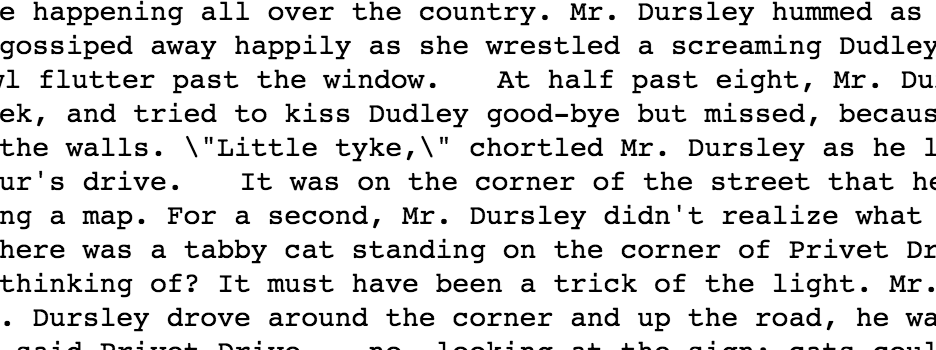

Why are there backslashes (`\`) before the quotes? In R, strings must be quoted:

In [267]:
my_string <- '"MLE" stands for "Maximum Likelihood Estimate"'
my_string

[1] "\"MLE\" stands for \"Maximum Likelihood Estimate\""

Now what if I want `my_string` to contain a quotation?
```
> my_string <- ""MLE" stands for "Maximum Likelihood Estimate""
Error in parse(text = x, srcfile = src): <text>:1:16: unexpected symbol
1: mystring3 <- ""MLE
                   ^
Traceback:
```

To create a string containing double quotes, while using double quotes to create it, you must *escape* the quotes using a backslash (`\`):

In [37]:
my_string <- "\"MLE\" stands for \"Maximum Likelihood Estimate\""
my_string

[1] "\"MLE\" stands for \"Maximum Likelihood Estimate\""

What if you actually want a backslash? Then you need to escape it as well:

In [269]:
"\\ is the backslash character"

[1] "\\ is the backslash character"

The printed representation of strings shows the escapes:

In [273]:
writeLines("\"MLE\" stands for \"Maximum Likelihood Estimate\"")

"MLE" stands for "Maximum Likelihood Estimate"


Use `writeLines()` to see the raw contents of the string. 

In [40]:
writeLines(my_string)

"MLE" stands for "Maximum Likelihood Estimate"


Let's see how this works for Harry Potter. Where does the first quotation in `ch1` occur? To find this, we will use the 

    str_locate(<string>, <substring>)
    
function:

In [278]:
str_locate(ch1, "\"")  # <---- note the escape.

start,end
2150,2150


Note the escape: we are searching `ch1` for the first occurence of the character `"`.

This tells us that the first quote occurs at position 2150 of `ch1`. To view a portion of a string, we can use the 

    str_sub(<string>, <start>, <end>)

command:

In [282]:
# str_sub(ch1, 2150, 2200) %>% print
writeLines(str_sub(ch1, 2150, 2200))

"Little tyke," chortled Mr. Dursley as he left the 


### Exercise
**Beginner**: what is the next quote in Ch.1?

**Advanced**: (about) how many quotes are there in Ch.1?

In [347]:
# beginner
ch1 %>% str_sub(2200) %>% str_locate("\"") 
ch1 %>% str_sub(2200 + 2979, 2200 + 2979 + 200)

start,end
2980,2980


[1] "\"The Potters, that's right, that's what I heard yes, their son, Harry\"　　Mr. Dursley stopped dead. Fear flooded him. He looked back at the whisperers as if he wanted to say something to them, but though"

The indices passed to `str_sub` can be negative, in which case they count from the end of the string:

In [294]:
str_sub("here is a string", -6, -1) # negative numbers count from the end

[1] "string"

### Exercise
**Beginner**: What's the last sentence of Chapter 1?

**Advanced**: Which chapter closes with the word "Voldemort"?

In [350]:
ch1 %>% str_sub(-200) # beginner
philosophers_stone %>% str_sub(-20) %>% print  # advanced

[1] "sin Dudley... He couldn't know that at this very moment, people meeting in secret all over the country were holding up their glasses and saying in hushed voices: \"To Harry Potter -- the boy who lived!"

 [1] "- the boy who lived!"     "ith Dudley's gang.　　"  
 [3] "ocking to come in.　　"   "e o' the pockets.\"　　" 
 [5] "d Hagrid had gone.　　"   "n the castle door.　　"  
 [7] " the dream at all.　　"   "ant to tell Harry?　　"  
 [9] " and thirteen was.　　"   "ll is one of them.　　"  
[11] "ious with himself.　　"   "personal question.　　"  
[13] "uesday,\" said Ron.　　"  " top of the tower.　　"  
[15] "it:　　Just in case.　　" "'t even Voldemort.　　"  
[17] "summer....\"　　THE END" 


### Escape sequences
`\\` and `\"` are examples of what are called "escape sequences". They tell R to do something special instead of just print the character. There are a couple of other useful escape sequences:

In [308]:
writeLines("First line\nSecond line") # newline

First line
Second line


In [310]:
writeLines("Text\tIndented Text\tText") # tab

Text	Indented Text	Text


### ASCII and unicode
Early computers could only read and write the ASCII character set, essentially just roman letters, numbers and some punctuation.

Nowadays, computers need to be able to understand alphabets from all over the world. For this we have *Unicode*.

You can print characters if you know their unicode using `\u`. For example, the copyright character has unicode `00A9`. Wikipedia has [a complete list](https://en.wikipedia.org/wiki/List_of_Unicode_characters).

In [174]:
writeLines("\u00A9")

©


## String functions in R

R base built-in commands for dealing with strings, but as with the base R data manipulation commands, they have an inconsistent interface and are hard to remember. Instead we will focus on functions provided by the `stringr` package. They all start with `str_`. Make sure to `library(stringr)` in order to be able to use them.

### Combining strings
Combining two strings into one is called "concatenation" by computer scientists and "combining strings" by everyone else. `concatenate` is hard to type, so it is abbreviated `str_c`:

In [315]:
# c("a", "b", "c") %>% print
str_c("Let us con", 
      " / ", 
      "catenate strings!") %>% print

[1] "Let us con / catenate strings!"


Like most other commands, `str_c` is vectorized, meaning it will take vector arguments and recycle the shorter ones to the length of the longest:

In [316]:
mystrings <- c("one", "two", "ten")
str_c("*** ", mystrings , " ***") # each argument is expanded to the length of the longest

[1] "*** one ***" "*** two ***" "*** ten ***"

As usual, `NA` values propagate:

In [15]:
mystrings_na <- c("one", "two", NA)
str_c("*** ", mystrings_na, " ***") # missingness is contagious!

[1] "*** one ***" "*** two ***" NA           

Another use of `str_c` is to combine multiple strings into one:

In [17]:
str_c("one", "two", "ten", sep = ", ") # can provide a separator

[1] "one, two, ten"

If you already know some R, you might recognize this as being equivalent to 
```{r} 
paste("one", "two", "ten", sep=", ")
```

Be mindful of the difference between passing in a vector of strings as a single argument, and passing in multiple strings as separate arguments:

In [18]:
str_c(mystrings, sep = ", ") # why does this not combine the strings?
str_c(mystrings, collapse = ", ") # use collapse if the strings you want to combine are in a vector

[1] "one" "two" "ten"

[1] "one, two, ten"

## Regular expressions

Regular expressions (regex, regexps) are a programming language that allows you to describe patterns in strings. They have a steep learning curve but are very powerful for working with text data. In this class we will just focus on the basics of regexps. A good tool for learning regexps is [regex101](https://regex101.com/), which lets you interactively edit and debug your regular expressions.

The commands `str_view` and `str_view_all` take a character vector and a regular expression, and show you how they match. 

The most basic regular expression is a plain string. It will match if the other string contains it as a substring.

In [58]:
options(jupyter.rich_display=T) # needed for str_view to work in jupyter notebook

In [318]:
# x = c("apple", "banana", "pear") %>% print
str_view(x, pattern = "an")

HTML widgets cannot be represented in plain text (need html)

Here `str_view` has matched our regexp (`"an"`) inside of the second string `banana` of the vector `x`.

You might wonder why, if `banana` has two instances of the pattern `an`, did `str_view` only return the first? This is its default behavior. To print all the matches, use `str_view_all`:

In [28]:
str_view_all(x, "an")

HTML widgets cannot be represented in plain text (need html)

### Wildcards
Our first non-trivial regular expression will use a wildcard: `.`. Used inside of a regular expression, the period matches any single character:

In [328]:
str_view_all("she succeeded on sleeping on thirteen sheets.",
             ".ee") 
# writeLines(".ee\\.")

HTML widgets cannot be represented in plain text (need html)

### Exercise
**Beginner** What's the first word in ch1 that ends in `ing`?

**Advanced** What 4-letter words in ch1 begin and end with the letter `e`?

In [337]:
ch1 %>% str_sub(200, 220) # beginner
ch1 %>% str_view(" e..e ") # advanced

[1] " anything strange or "

HTML widgets cannot be represented in plain text (need html)

Suppose I want to answer the question: what are the characters named in Harry Potter? At a first pass, we might guess that a character name is one (or more) capitalized words. How can I match capitalized words?

A capitalized word matches the following *pattern*:

    capitalized word = "<upper case letter><zero or more other letters><space>"

A regular expression lets us match this type of pattern using something called a *character class*.

### Character classes
A "character class" is a special pattern that matches a collection of characters. For example, `\d` will match any digit:

In [62]:
str_view(c("number1", "two", "3hree"), "\\d")

HTML widgets cannot be represented in plain text (need html)

Similarly, `\s` will match whitespace (spaces, tabs and newlines):

In [63]:
y = c("spa ce", "hello\tworld", "multi\nline")
writeLines(y)
str_view(y, "\\w")

spa ce
hello	world
multi
line


HTML widgets cannot be represented in plain text (need html)

You can form your own character class using square brackets: `[abc]` will match *one of* `a`, `b`, or `c`. In other words, the 'width' of a character class is one character by default.

In [64]:
str_view(x, '[be]a')  # Match either 'b' or 'e' followed by a

HTML widgets cannot be represented in plain text (need html)

We can use character classes to match the first capital letter of a capitalized word:

In [66]:
str_view(c("These", "are", "some Capitalized words"),
         "[ABCDEFGHIJKLMNOPQRSTUVWXYZ]")

HTML widgets cannot be represented in plain text (need html)

We do not need to go to all the trouble of typing each capital letter. We can use the shortcut `[A-Z]` instead.

In [72]:
str_view(c("These", "are", "some Capitalized words"), "[A-Z]")

HTML widgets cannot be represented in plain text (need html)

In [338]:
str_view(str_sub(ch1, 1, 50), "[A-Z]")

HTML widgets cannot be represented in plain text (need html)

So far we are matching just single characters. Now I want to expand the match to include the whole word. To do so I will use the special character class called `\w`, which matches a "word character":

In [207]:
str_view_all("Here is a sentence", "\\w")

HTML widgets cannot be represented in plain text (need html)

Note the additional level of escaping needed here: "\\w" gets parsed by R into the string `\w`:

In [208]:
writeLines("\\w")

\w


The `\w` is then parsed again by the regular expression.

The string "\w" is not valid in R, because there is no escape code "\w":

```
> "\w"
Error: '\w' is an unrecognized escape in character string starting ""\w"
Traceback:
```

Using `\w`, we can expand our regexp to match capitalized words containing two letters:

In [210]:
str_view(str_sub(ch1, 1, 50), "[A-Z]\\w")

HTML widgets cannot be represented in plain text (need html)

Or two:

In [211]:
str_view(str_sub(ch1, 1, 50), "[A-Z]\\w\\w")
str_view(str_sub(ch1, 1, 50), "[A-Z]\\w\\w\\w")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Now we have run into an issue: by adding more `\w`s, we have excluded the all capitalized words with three letters. But we want to match capitalized words of any length. To do this, we will introduce a *quantifier*. The `*` character says, "match zero or more of the thing that came immediately before me":

In [202]:
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w*")
str_extract_all(str_sub(ch1, 1, 50), "[A-Z]\\w*")

HTML widgets cannot be represented in plain text (need html)

[[1]]
[1] "THE"     "BOY"     "WHO"     "LIVED"   "Mr"      "Mrs"     "Dursley"

A closely related quantifier is `+`, which matches *one* or more of the preceding thing:

In [87]:
str_view(str_sub(ch1, 1, 50), "[A-Z]\\w\\w\\w+")
# note the difference with:
str_view(str_sub(ch1, 1, 50), "[A-Z]\\w\\w\\w*")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

The most general form of quantifier is `{<min>,<max>}`:

In [92]:
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w{1,3}")
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w{1,}")  # omitting <max> implies no limit
str_view_all(str_sub(ch1, 1, 50), "[A-Z]\\w{0,2}")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

### Exercise
Find all capitalized words in chapter 1 that have at least 6 characters.

In [341]:
str_extract_all(ch1, "[A-Z]\\w{5,}") %>% 
    unlist %>% table

.
   Although     Bonfire    Borrowed     Bristol     Britain      Couldn 
          1           1           1           1           1           1 
    Dedalus      Diggle      Dudley  Dumbledore      Dundee     Dursley 
          1           1           9          37           1          47 
 Dursleyish    Dursleys    Everyone     Exactly     Experts      Famous 
          1           7           1           1           1           2 
     Flocks      Godric   Grunnings      Hagrid      Harold      Harvey 
          1           1           2          14           1           1 
     Hollow      Howard      Inside     Instead      Little      London 
          1           1           1           2           1           1 
 McGonagall    McGuffin      Muggle     Muggles  Mysterious     Nothing 
         26           1           3           6           1           1 
     People     Perhaps     Petunia     Pomfrey      Potter     Potters 
          2           1           3           1  

### Word boundaries
The pattern we used above for finding capital words is not quite accurate, since it assumes that a space comes after each word. Also, it matches capital letters occurring in the middle of a word.

In [214]:
str_view_all(c("Dick vanDyke was a TV host", "Roger Federer"),
             "[A-Z]\\w* ")

HTML widgets cannot be represented in plain text (need html)

A better pattern would be something like:

    capitalized word = <word boundary><upper case letter><zero or more other letters><word boundary>
    
Regular expressions give us the ability to do this using the special character `\b`. This matches the boundary of a word:

In [206]:
str_view_all("Here is a sentence", "\\b")

HTML widgets cannot be represented in plain text (need html)

Let's build a regex that counts the words in a sentence. First, we need a pattern for what a word looks like:

    <word boundary><one or more letters><word boundary>

### Exercise
Translate this pattern into a regexp. Test it out on your favorite sentence:

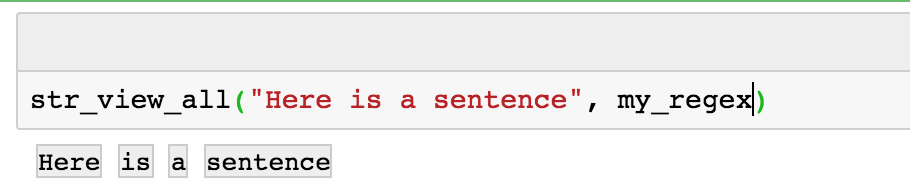

In [216]:
# Your code here

The `str_count()` function counts the number of matches:

In [220]:
str_view_all("Here is a sentence", "sentence")
str_count("Here is a sentence", "sentence")
str_count(ch1, ".")
str_length(ch1)

HTML widgets cannot be represented in plain text (need html)

[1] 1

[1] 25928

[1] 25928

### Exercise
**Beginner** How many words are in Chapter 1?

**Advanced** How many words ending in `ing` are in Chapter 1?

## Grouping
In the previous exercise we found that "Professor" is one of the most common capitalized words. Is there a character named Professor, or is it just a title? Now let us try to match one or more capitalized words in a row. We can accomplish this by creating a *group*, and then applying a quantifier to it. 

To create a group, I surround a part of my regexp with parentheses:

In [230]:
str_view("this will be grouped", "[a-z]+ ?")
str_view("this will be grouped", "([a-z]+ ?)")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

The parentheses do not change the regular expression (but they are doing something else, which we will discuss in the next lecture.) But now I can apply a quantifier to the whole group:

In [228]:
str_view("this will be grouped", "([a-z]+ ?)+")

HTML widgets cannot be represented in plain text (need html)

(Aside: This is sort of the "Ah-ha!" moment when it comes to learning regular expressions. Once you understand that you can do things like this, you begin to unlock their power.)

In [343]:
str_extract_all(ch1, "([A-Z]\\w{4,} )+", 
                simplify=T) %>% fct_count %>% 
                top_n(10)

Selecting by n


f,n
Dudley,7
Dumbledore,18
Dursley,38
Dursleys,5
Hagrid,7
Harry,9
Muggles,5
Potters,5
Privet,5
Professor,12


Earlier we looked at quotations. The first quotation in chapter 1 is:

In [167]:
str_sub(ch1, 2150, 2163)

[1] "\"Little tyke,\""

How can we find other quotes? The pattern for a quote is a quotation mark, followed by any number of things that are not a quotation mark, followed by another quotation mark:

    <quotation mark><anything that is not a quotation mark><quotation mark>


To match this, we will use a *negation*. A negation is a character class that begins with the character "^". It matches anything that in *not* inside the character class:

In [231]:
str_view_all("match doesn't match", "[^aeiou]+")

HTML widgets cannot be represented in plain text (need html)

To match a quotation, we'll input the pattern that we specified above:

In [232]:
str_view_all('"Here is a quotation", said the professor. "And here is another."',
             '"[^"]+"')

HTML widgets cannot be represented in plain text (need html)

### Exercise
**Beginner** How many quotations are there in ch1?

**Advanced** What is the longest quotation in the whole book?

In [234]:
# Your code here